In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metrics 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
Default = pd.read_csv('Default.csv')

In [3]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
Default.shape

(10000, 5)

In [5]:
Default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


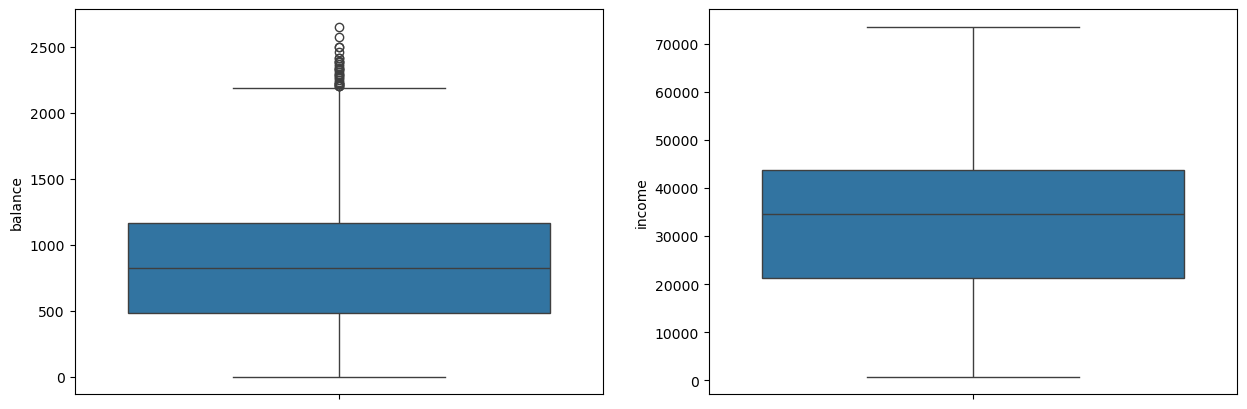

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

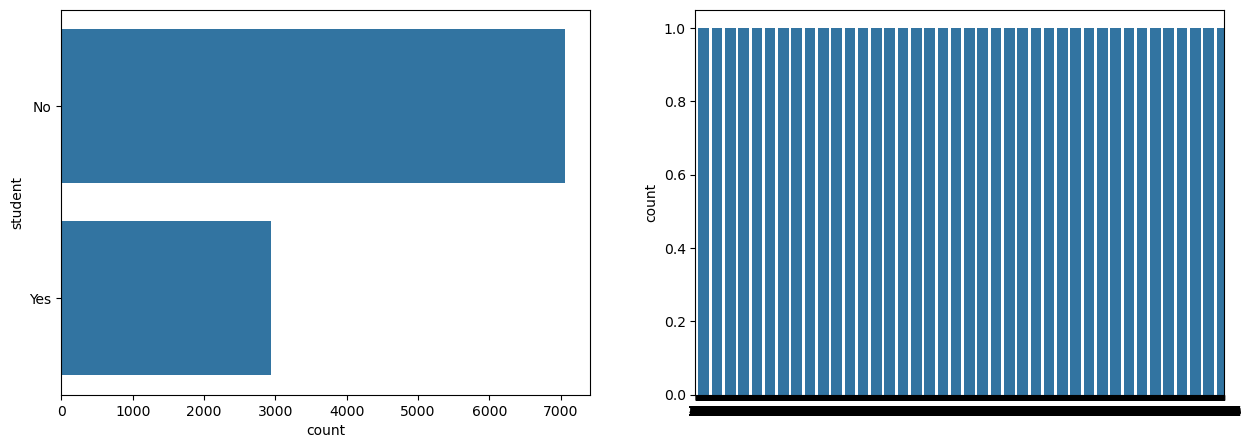

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])

plt.subplot(1,2,2)
sns.countplot(Default['balance'])
plt.show() 

In [8]:
Default["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [9]:
Default["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [10]:
Default["student"].value_counts(normalize =True) 

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [11]:
Default["default"].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

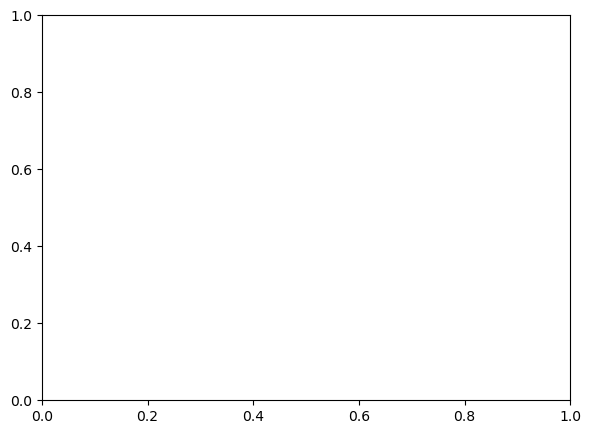

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'],Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])
plt.show()

In [ ]:
pd.crosstab(Default['student'],Default['default'] , normalize='index').round(2)

In [ ]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

In [ ]:
Default.isnull().sum()

In [ ]:
Q1,Q3=Default['balance'].quantile([.25,.75])
IQR =Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [ ]:
UL

In [ ]:
df=Default[Default['balance']>UL]

In [ ]:
df

In [ ]:
df['default'].count()

In [ ]:
df['default'].value_counts(normalize=True)

In [ ]:
df['default'].value_counts()

In [ ]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

In [ ]:
sns.boxplot(y=Default['balance'])
plt.show()

In [ ]:
Default=pd.get_dummies(Default,drop_first=True)

In [ ]:
Default.head()


In [ ]:
Default.columns = ['balance','income','default','student','Unamed']

In [ ]:
Default.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=Default.drop('default',axis=1)
y=Default['default']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.3, random_state = 21) 

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of SMOTE
sm = RandomOverSampler(random_state=33, sampling_strategy=0)

In [ ]:
x_res, y_res = sm.fit_resample(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()  

In [ ]:
lr.fit(x_res,y_res) 

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matric(y_test,y_pred)